In [1]:
# import the package
import os
import glob
import pathlib
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


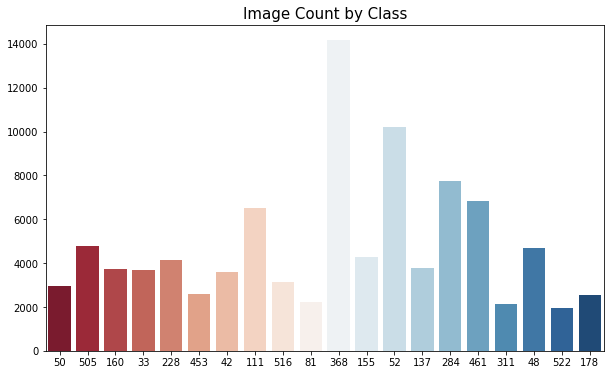

In [2]:
# image number
image_folder = glob.glob('data/filter/*')
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(i+'/'))
    nimgs[i]=nimages

labels = pd.Series(list(nimgs.keys())).str.split('/').apply(lambda x: x[-1]).values

plt.figure(figsize=(10, 6))
sns.barplot(list(range(len(nimgs))), list(nimgs.values()), palette='RdBu')
plt.xticks(range(len(nimgs)), labels)
plt.title('Image Count by Class', fontsize=15)
plt.show()

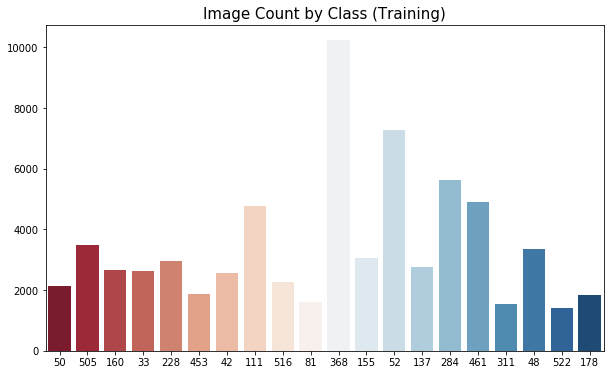

In [3]:
image_folder = glob.glob('data/training/*')
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(i+'/'))
    nimgs[i]=nimages

labels = pd.Series(list(nimgs.keys())).str.split('/').apply(lambda x: x[-1]).values

plt.figure(figsize=(10, 6))
sns.barplot(list(range(len(nimgs))), list(nimgs.values()), palette='RdBu')
plt.xticks(range(len(nimgs)), labels)
plt.title('Image Count by Class (Training)', fontsize=15)
plt.show()

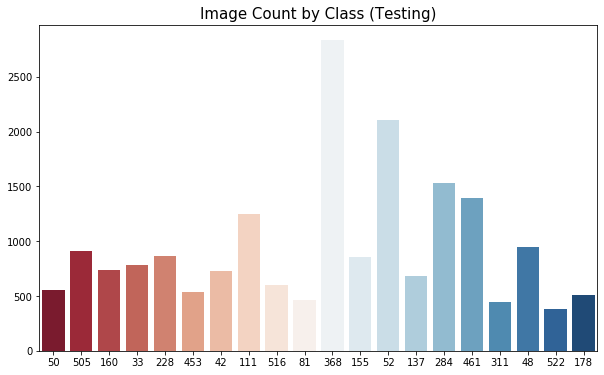

In [4]:
image_folder = glob.glob('data/testing/*')
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(i+'/'))
    nimgs[i]=nimages

labels = pd.Series(list(nimgs.keys())).str.split('/').apply(lambda x: x[-1]).values

plt.figure(figsize=(10, 6))
sns.barplot(list(range(len(nimgs))), list(nimgs.values()), palette='RdBu')
plt.xticks(range(len(nimgs)), labels)
plt.title('Image Count by Class (Testing)', fontsize=15)
plt.show()

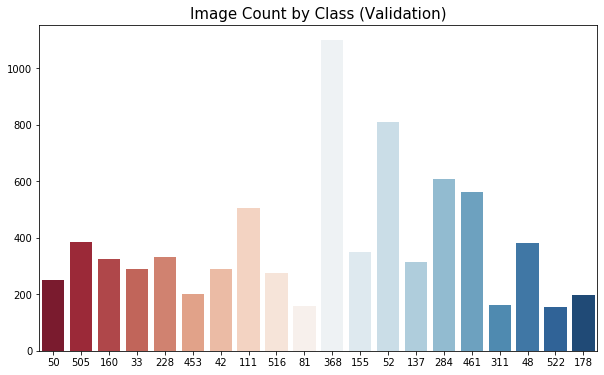

In [5]:
image_folder = glob.glob('data/validation/*')
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(i+'/'))
    nimgs[i]=nimages

labels = pd.Series(list(nimgs.keys())).str.split('/').apply(lambda x: x[-1]).values

plt.figure(figsize=(10, 6))
sns.barplot(list(range(len(nimgs))), list(nimgs.values()), palette='RdBu')
plt.xticks(range(len(nimgs)), labels)
plt.title('Image Count by Class (Validation)', fontsize=15)
plt.show()

X           Y
count  100.000000  100.000000
mean   317.650000  315.420000
std     10.341028   20.767194
min    253.000000  180.000000
25%    320.000000  320.000000
50%    320.000000  320.000000
75%    320.000000  320.000000
max    320.000000  320.000000

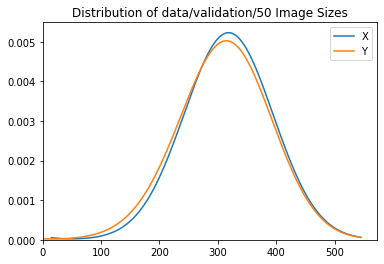

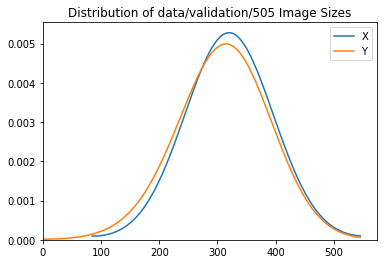

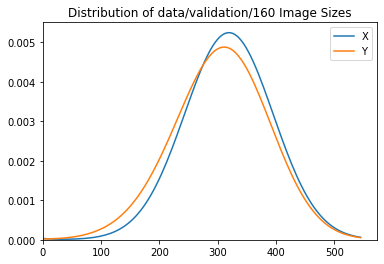

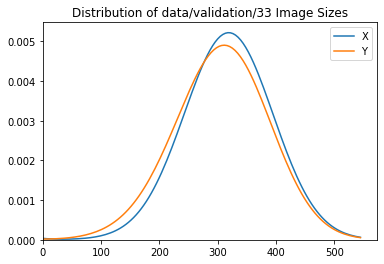

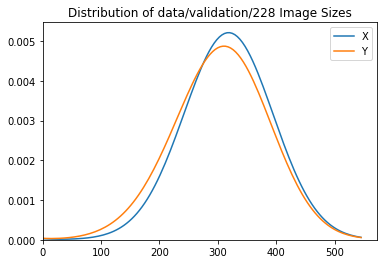

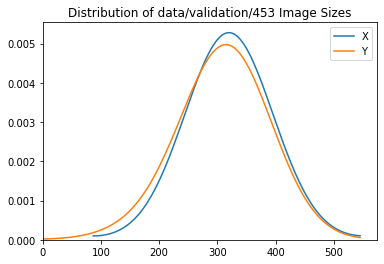

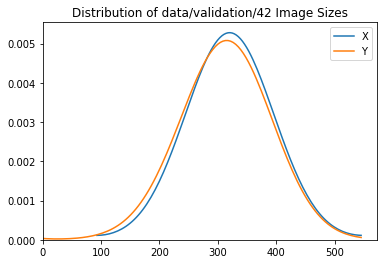

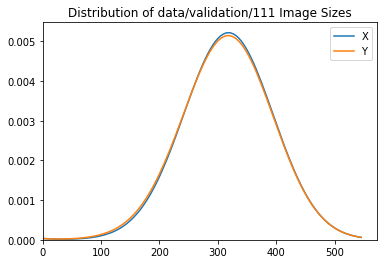

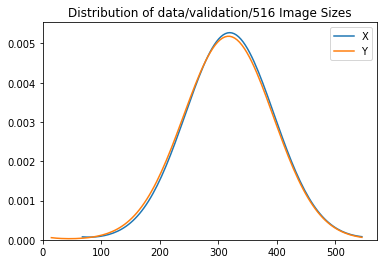

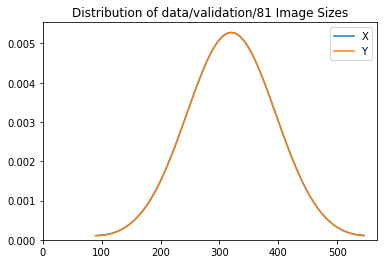

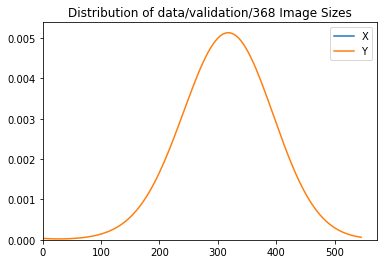

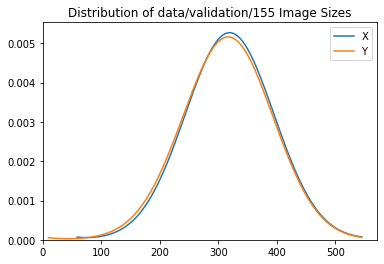

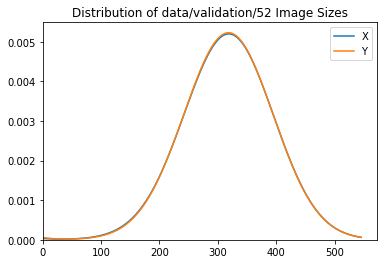

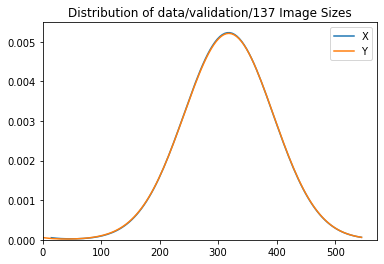

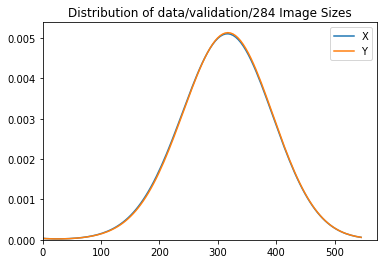

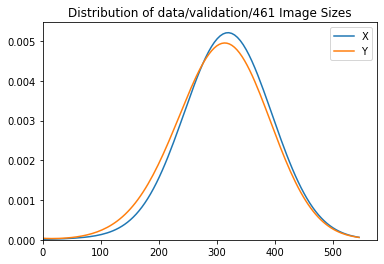

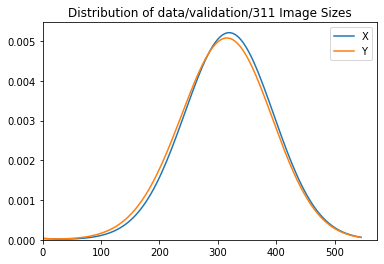

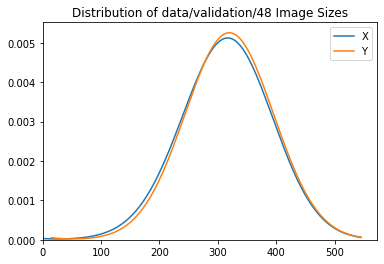

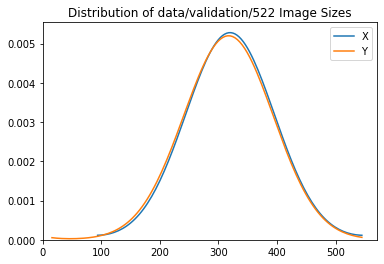

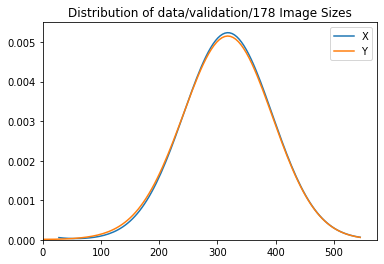

In [6]:
# image size
for i in image_folder:
    sample_images = list(pathlib.Path(i+'/').rglob('*/'))
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=100)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(6, 4))
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {} Image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

shapes.describe()

In [7]:
folder = {}

for i in image_folder:
    folder[i] = os.listdir(i)[:4]

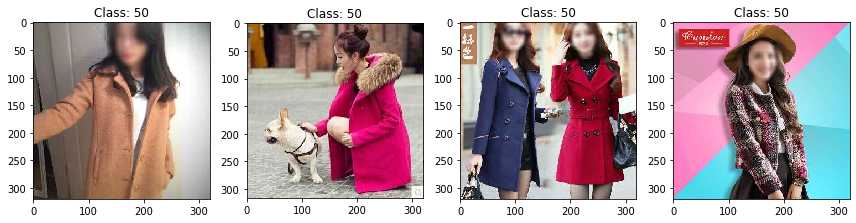

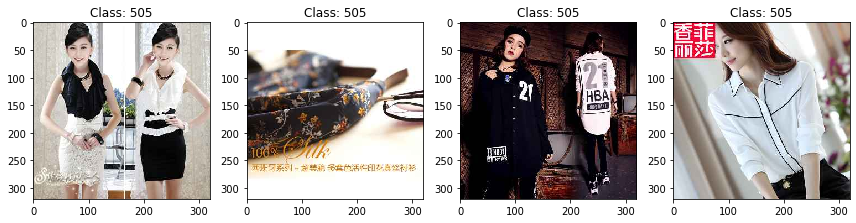

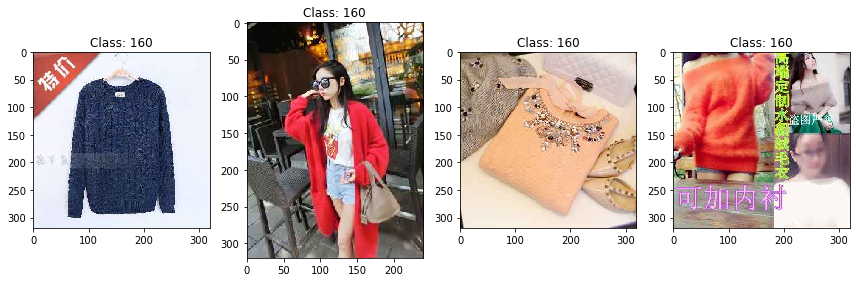

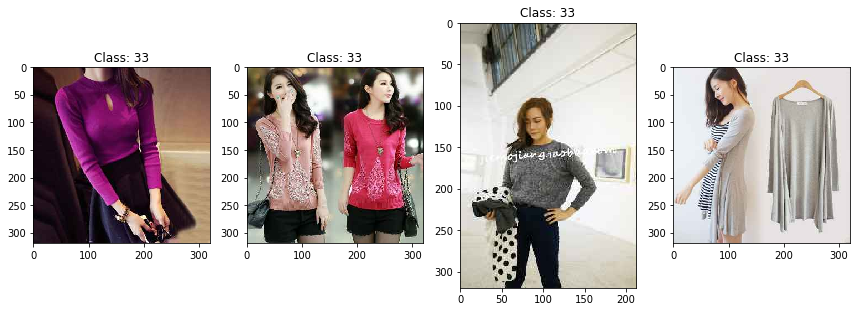

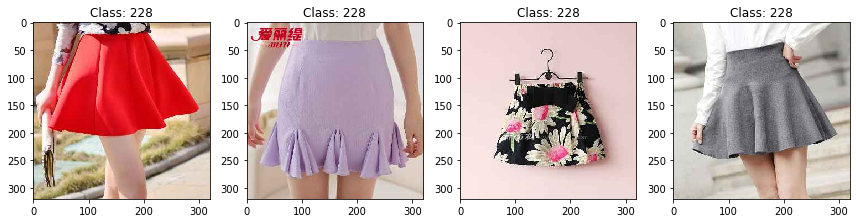

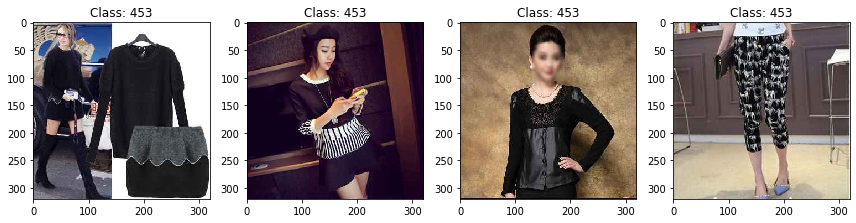

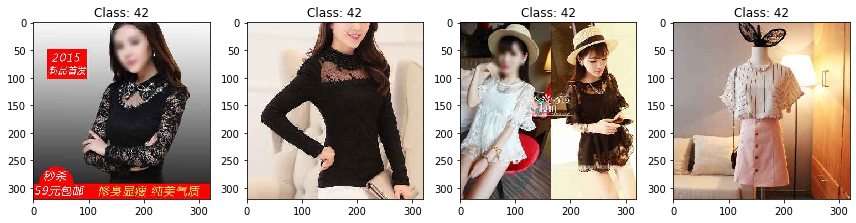

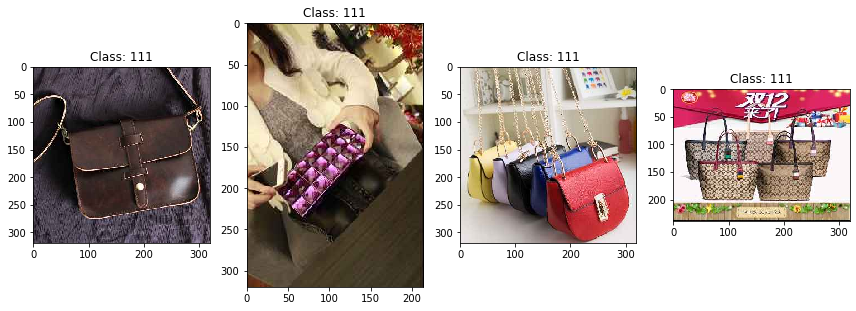

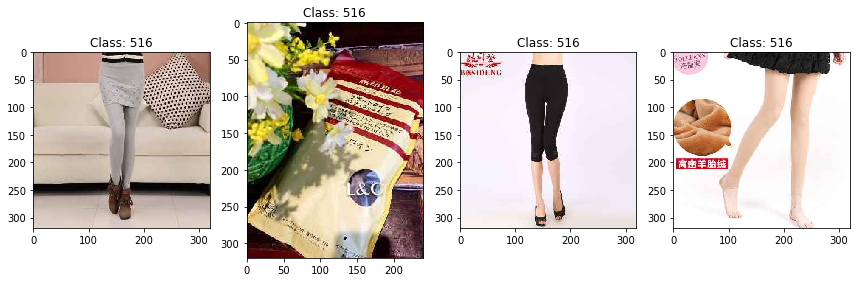

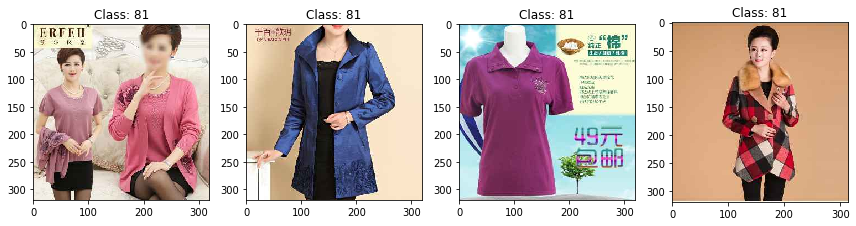

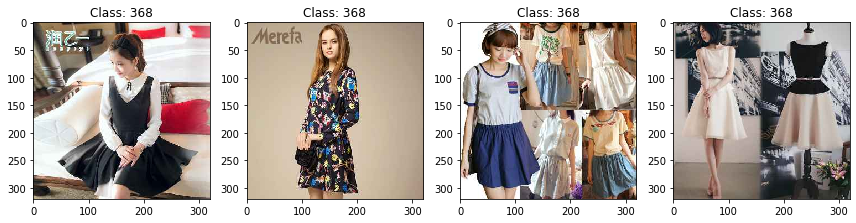

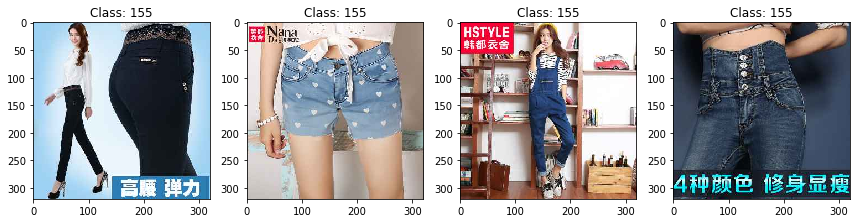

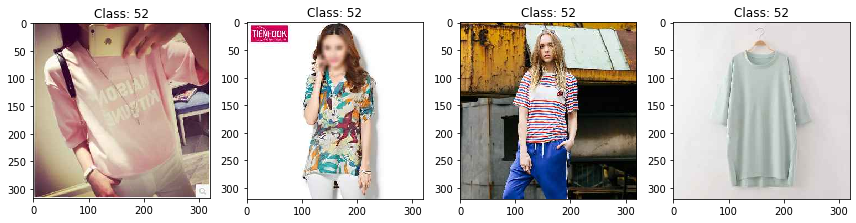

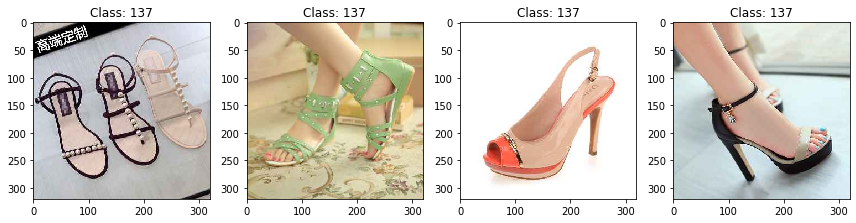

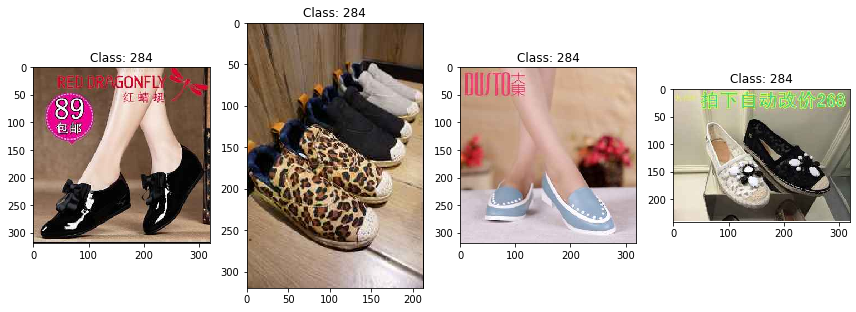

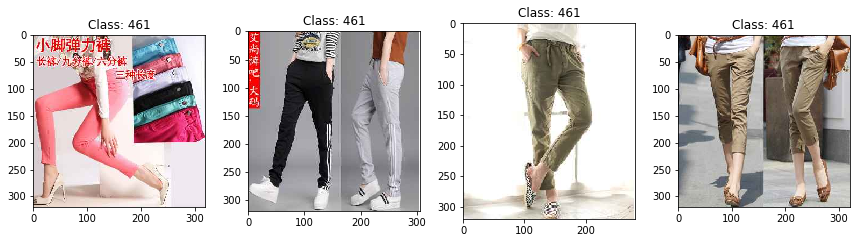

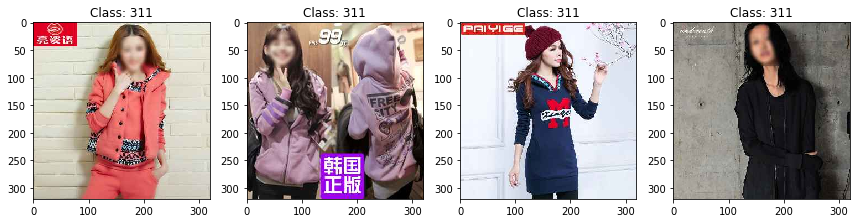

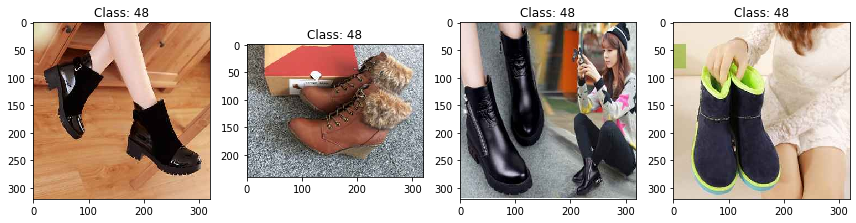

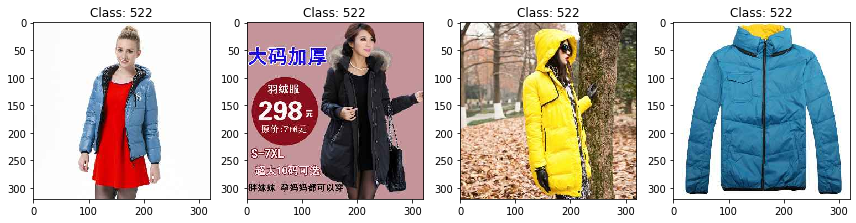

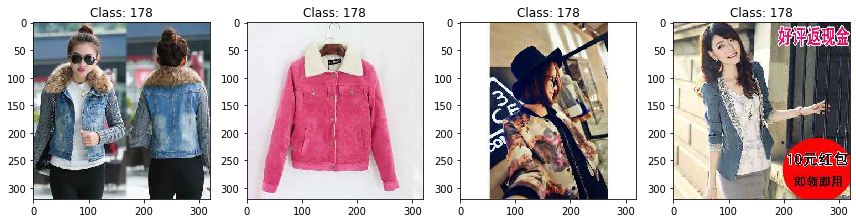

In [12]:
for k, v in folder.items(): 
    plt.figure(figsize = (12,12))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        img = cv2.imread(k + '/' + v[i])
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.title('Class: ' + k.split('/')[-1])
        plt.tight_layout()
    plt.show()